In [26]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', False)
%matplotlib inline
plt.style.use('seaborn-white')
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [11]:
df = pd.read_csv('/Users/smoot/Desktop/Hitters.csv')
df.head(2)

       Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
0  -Andy Allanson    293    66      1    30   29     14      1     293     66   
1     -Alan Ashby    315    81      7    24   38     39     14    3449    835   

     ...      CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0    ...         30    29      14       A        E     446       33      20   
1    ...        321   414     375       N        W     632       43      10   

   Salary  NewLeague  
0     NaN          A  
1   475.0          N  

[2 rows x 21 columns]

In [14]:
df.dropna(inplace = True)

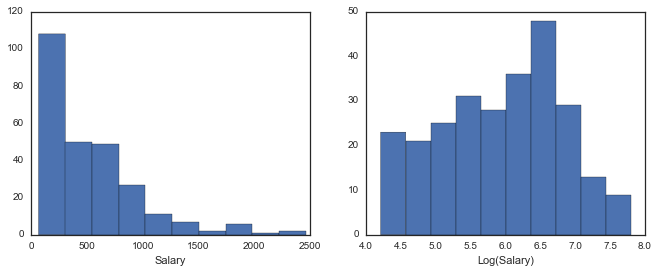

In [18]:
X = df[['Years', 'Hits']].as_matrix()
y = np.log(df.Salary.as_matrix())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.as_matrix())
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

In [20]:
regr = DecisionTreeRegressor(max_leaf_nodes = 5)
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [23]:
graph = print_tree(regr, features = ['Years', 'Hits'])
Image(graph.create_png())

NameError: global name 'dot_parser' is not defined